In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
## read the dataset
df = pd.read_csv('exams.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,high school,standard,none,73,65,58
1,female,group C,high school,free/reduced,completed,47,50,50
2,female,group A,some college,standard,completed,86,100,95
3,female,group D,master's degree,free/reduced,completed,84,100,100
4,female,group C,some college,free/reduced,none,49,60,62


In [24]:
df.shape

(1000, 8)

In [25]:
## Data checks to perform
# Check Missing values
# check duplicates
# check data type
# check number of unique value in each column
# check statistics of data set
# check various categories present in the different categorical column

In [26]:
# Check Missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [27]:
# insights or observation
# There is no missing values

In [28]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [29]:
# check duplicates
df.duplicated().sum()

0

In [30]:
# There is no duplicates values in the dataset

In [31]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
## check the number of unique values in each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     73
reading_score                  70
writing_score                  72
dtype: int64

In [33]:
## check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.307000,69.911000,68.601000
std,14.940146,14.435285,15.149102
min,22.000000,29.000000,22.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [34]:
# Insight or observations
# From the above description of numerical data, all means are very close to each other- between 66 and 69
# All the standard deviation are also close - between 14.3 - 15.14
# While there is a minimum of 22 for maths, other are having 22 and 29 values

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,high school,standard,none,73,65,58
1,female,group C,high school,free/reduced,completed,47,50,50
2,female,group A,some college,standard,completed,86,100,95
3,female,group D,master's degree,free/reduced,completed,84,100,100
4,female,group C,some college,free/reduced,none,49,60,62


In [36]:
[feature for feature in df.columns if df[feature].dtype!='O']

['math_score', 'reading_score', 'writing_score']

In [37]:
# segrregate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [38]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [39]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [40]:
# aggregate the total score with mean
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,male,group C,high school,standard,none,73,65,58,196,65.333333
1,female,group C,high school,free/reduced,completed,47,50,50,147,49.000000
2,female,group A,some college,standard,completed,86,100,95,281,93.666667
3,female,group D,master's degree,free/reduced,completed,84,100,100,284,94.666667
4,female,group C,some college,free/reduced,none,49,60,62,171,57.000000


<AxesSubplot: xlabel='average', ylabel='Count'>

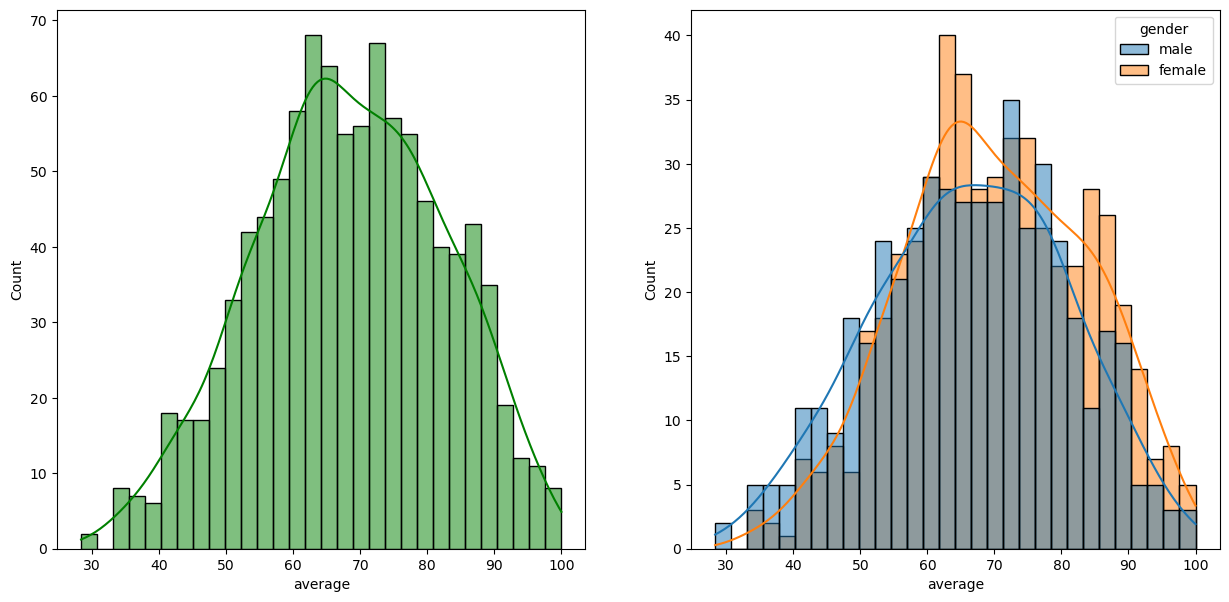

In [43]:
## Explore more visualization
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

In [44]:
## Insights
# Female student tend to perform well than male students

<AxesSubplot: xlabel='average', ylabel='Count'>

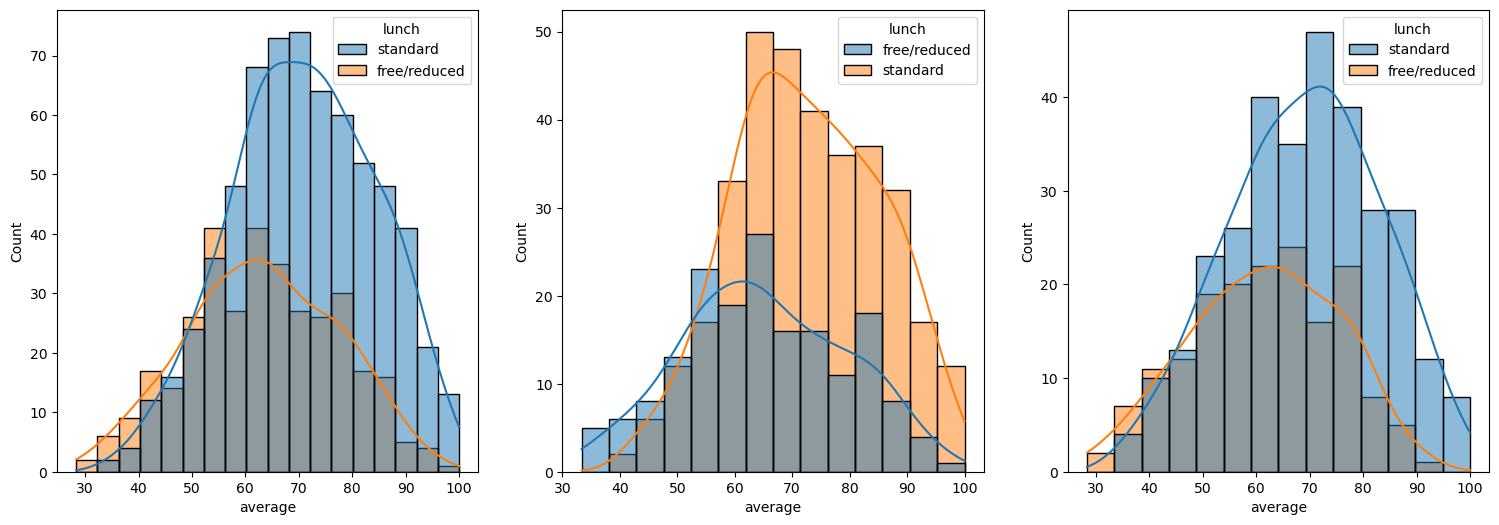

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')

In [48]:
## Insights
# Standard lunch help students perform well in exams
# Standard lunch helps perform well in exams be it a male or female

In [49]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,male,group C,high school,standard,none,73,65,58,196,65.333333
1,female,group C,high school,free/reduced,completed,47,50,50,147,49.000000
2,female,group A,some college,standard,completed,86,100,95,281,93.666667
3,female,group D,master's degree,free/reduced,completed,84,100,100,284,94.666667
4,female,group C,some college,free/reduced,none,49,60,62,171,57.000000


<AxesSubplot: xlabel='average', ylabel='Count'>

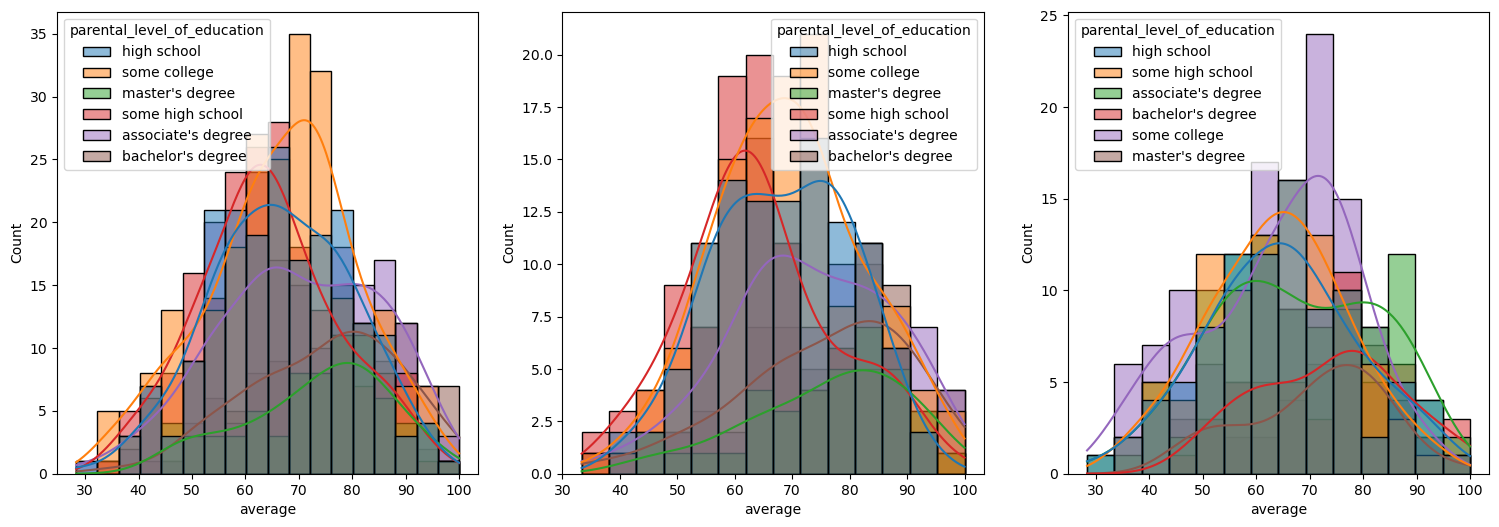

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

In [51]:
## Insights
# In general parent's education don't help student perform well in exam.
# 2nd plot we can see that there is no effect of parent's education on female studentss
# 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in the exam

<AxesSubplot: xlabel='average', ylabel='Count'>

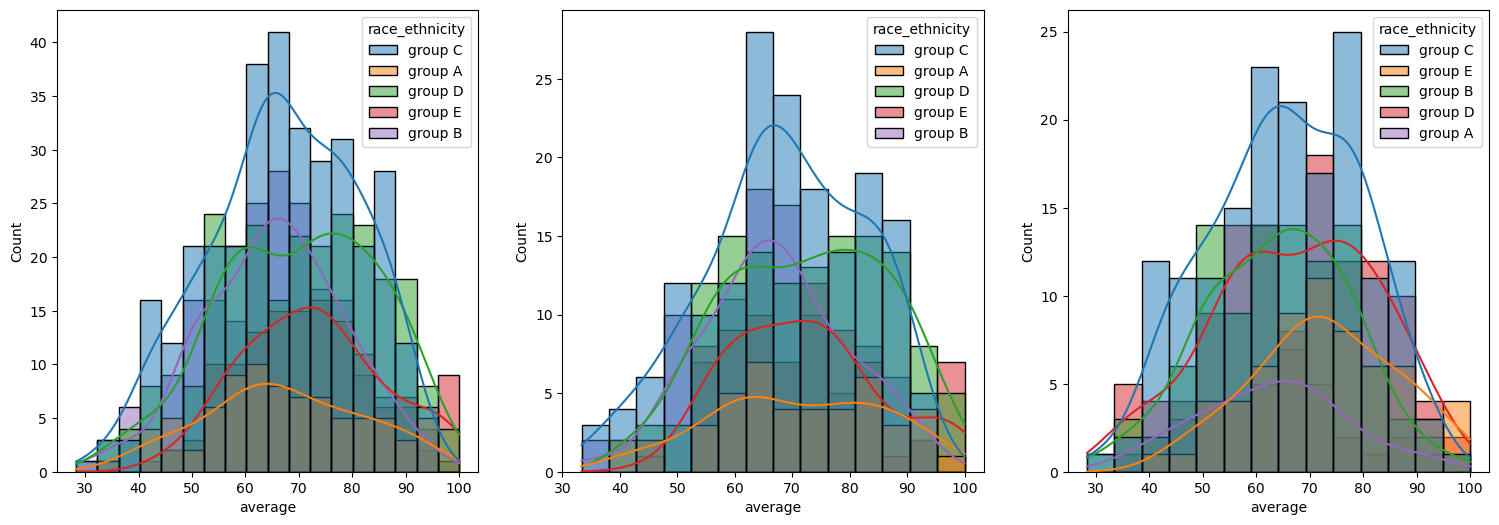

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')

In [53]:
## Insights
# students of group A and group B tends to perform poorly in exam
# Students of group A and group B tends to perform poorly in exam irrespective of wherher they are male or female

<AxesSubplot: >

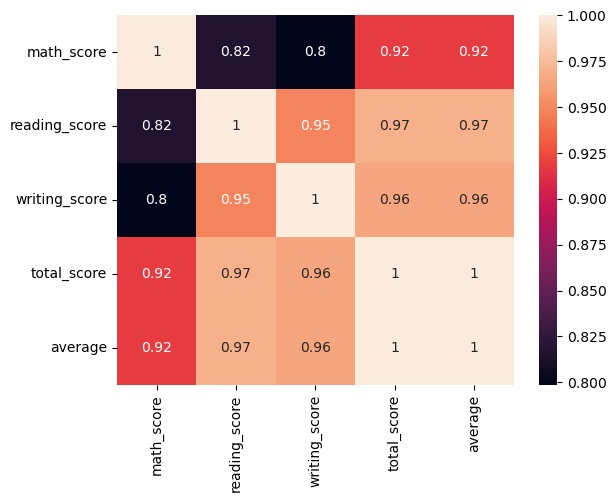

In [54]:
sns.heatmap(df.corr(), annot=True)